## City of Charlotte 311 Reports Geospatial Mapping
In this notebook, I will similarly construct a dataframe to filter nad plot desired data of 311 Reports.


In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from datetime import datetime

import geopandas as gpd

from bokeh.io import output_file, show, output_notebook
from bokeh.models import ColumnDataSource, GMapOptions
from bokeh.plotting import gmap
import googlemaps

import plotly.express as px
import plotly.graph_objects as go


In [64]:
px.set_mapbox_access_token(open("mapbox_access_token.txt").read())

In [65]:
clt_df = pd.read_csv("Service_Requests_311.csv")

In [66]:
clt_df

,X,Y,OBJECTID,DEPARTMENT,DIVISION,REQUEST_NO,FISCAL_YEAR,FISCAL_MONTH,REQUEST_TYPE,RECEIVED_DATE,...,STATE,ZIP_CODE,FULL_ADDRESS,X_COORD,Y_COORD,LATITUDE,LONGITUDE,COUNCIL_DISTRICT,GlobalID,PID
0,1.436067e+06,500707.000091,1,Solid Waste Services,Sanitation,5472783,2017,11-May,MISSED RECYCLING,2017/05/16 18:09:00+00,...,NC,28134.0,"9342 CHINA GROVE CHURCH RD, CHARLOTTE, NC 28134",1436067.0,500707.0,35.111067,-80.885806,3.0,{875F9726-8F12-46B0-9B0E-973EAB53E133},20511215
1,1.466549e+06,545050.999986,2,Transportation,CDOT Customer Service,6268913,2017,01-Jul,CDOT STREET SIGN REP/REPL,2016/07/01 08:24:19+00,...,NC,28205.0,"3201 LIBETH ST, CHARLOTTE, NC 28205",1466549.0,545051.0,35.234439,-80.786565,1.0,{4F362CB2-41A1-4230-A6DF-C3B74016C393},09311303
2,1.413847e+06,583950.999941,3,Solid Waste Services,Special Services,6268914,2017,01-Jul,STREET SWEEPING/FLUSHING,2016/07/01 10:39:00+00,...,NC,28214.0,"11305 MANGLA DR, CHARLOTTE, NC 28214",1413847.0,583951.0,35.338567,-80.965603,2.0,{EABE5397-DB2D-422E-9EF6-DC5B11EF627D},03123823
3,1.409157e+06,575409.999963,4,Solid Waste Services,Special Services,6268915,2017,01-Jul,STREET SWEEPING/FLUSHING,2016/07/01 10:40:00+00,...,NC,28214.0,"1839 BRAY DR, CHARLOTTE, NC 28214",1409157.0,575410.0,35.314848,-80.980754,2.0,{27565C45-F092-44FF-B2F8-8CBC98221073},03148650
4,1.486575e+06,547684.999967,5,Solid Waste Services,Sanitation,6268916,2017,01-Jul,NON_RECYCLABLE ITEMS,2016/07/01 10:44:21+00,...,NC,28215.0,"7024 ROTHMORE ST, CHARLOTTE, NC 28215",1486575.0,547685.0,35.242647,-80.719663,5.0,{82766A1C-2640-4029-9CA6-687C2CBC1AC7},10724552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852638,1.476123e+06,600546.999886,1852639,Solid Waste Services,Sanitation,8689715,2022,11-May,NON_RECYCLABLE ITEMS,2022/05/06 01:11:31+00,...,NC,28269.0,"8210 LYNNEWOOD GLEN DR, CHARLOTTE, NC 28269",1476123.0,600547.0,35.387367,-80.757798,4.0,{7F1AE264-2E66-403B-9656-D12D968466B3},02970406
1852639,1.463099e+06,478514.999856,1852640,Solid Waste Services,Sanitation,8689716,2022,11-May,NON_RECYCLABLE ITEMS,2022/05/06 01:16:29+00,...,NC,28277.0,"11429 BLUE BLOSSOM RD, CHARLOTTE, NC 28277",1463099.0,478515.0,35.051477,-80.794090,7.0,{8120676A-9BA3-4D7B-A817-2F76C570CA0B},22916471
1852640,1.441169e+06,498738.000092,1852641,Solid Waste Services,Sanitation,8689717,2022,11-May,NON_RECYCLABLE ITEMS,2022/05/06 01:21:29+00,...,NC,28210.0,"10124 HANOVER GLEN RD, CHARLOTTE, NC 28210",1441169.0,498738.0,35.105923,-80.868625,6.0,{9063F099-0E45-4613-A865-FFB6C5F0E76D},20718143
1852641,1.448040e+06,553857.000090,1852642,Solid Waste Services,Sanitation,8689718,2022,11-May,RECYCLABLE ITEMS,2022/05/06 01:21:30+00,...,NC,28216.0,"1801 ST PAUL ST, CHARLOTTE, NC 28216",1448040.0,553857.0,35.257700,-80.849088,2.0,{7899BBF3-BFA6-4350-8F37-D20736B37CD6},07505937


In [67]:
clt_df.describe()

,X,Y,OBJECTID,REQUEST_NO,FISCAL_YEAR,NEIGHBORHOOD_PROFILE_AREA,BLOCK_NO,ZIP_CODE,X_COORD,Y_COORD,LATITUDE,LONGITUDE,COUNCIL_DISTRICT
count,1.771777e+06,1.771777e+06,1.852643e+06,1.852643e+06,1.852643e+06,1.771749e+06,1.804104e+06,1.801664e+06,1.771777e+06,1.771777e+06,1.771765e+06,1.771765e+06,1.748947e+06
mean,1.455884e+06,5.374140e+05,9.263220e+05,7.474160e+06,2.019489e+03,2.168778e+02,5.083783e+03,2.821741e+04,1.455884e+06,5.374140e+05,3.521290e+01,-8.082194e+01,3.787053e+00
std,2.283269e+04,3.049066e+04,5.348121e+05,7.070121e+05,1.676279e+00,1.244892e+02,1.557797e+04,6.181599e+02,2.283269e+04,3.049066e+04,8.386482e-02,8.122716e-02,2.011573e+00
min,1.384994e+06,4.644550e+05,1.000000e+00,5.472783e+06,2.017000e+03,2.000000e+00,1.000000e+00,3.000000e+00,1.384994e+06,4.644550e+05,3.501230e+01,-8.556829e+01,1.000000e+00
25%,1.441273e+06,5.150220e+05,4.631615e+05,6.853118e+06,2.018000e+03,1.130000e+02,2.001000e+03,2.821000e+04,1.441273e+06,5.150220e+05,3.515064e+01,-8.087014e+01,2.000000e+00
50%,1.457633e+06,5.395320e+05,9.263220e+05,7.472847e+06,2.019000e+03,2.240000e+02,4.327000e+03,2.821500e+04,1.457633e+06,5.395320e+05,3.521913e+01,-8.081563e+01,4.000000e+00
75%,1.472635e+06,5.592040e+05,1.389482e+06,8.092511e+06,2.021000e+03,3.360000e+02,7.340000e+03,2.826200e+04,1.472635e+06,5.592040e+05,3.527296e+01,-8.076554e+01,6.000000e+00
max,1.534475e+06,6.487410e+05,1.852643e+06,8.689719e+06,2.028000e+03,4.750000e+02,8.514135e+06,9.890800e+04,1.534475e+06,6.487410e+05,3.551843e+01,-7.607136e+01,7.000000e+00


In [68]:
clt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852643 entries, 0 to 1852642
Data columns (total 29 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   X                           float64
 1   Y                           float64
 2   OBJECTID                    int64  
 3   DEPARTMENT                  object 
 4   DIVISION                    object 
 5   REQUEST_NO                  int64  
 6   FISCAL_YEAR                 int64  
 7   FISCAL_MONTH                object 
 8   REQUEST_TYPE                object 
 9   RECEIVED_DATE               object 
 10  INTERNAL_FIELD_OBSERVATION  object 
 11  TITLE                       object 
 12  CMPD_DIVISION               object 
 13  NEIGHBORHOOD_PROFILE_AREA   float64
 14  BLOCK_NO                    float64
 15  STREET_DIRECTION            object 
 16  STREET_NAME                 object 
 17  STREET_TYPE                 object 
 18  CITY                        object 
 19  STATE                

In [69]:
clt_df.shape

(1852643, 29)

In [70]:
clt_df['REQUEST_NO'].nunique() #So each record seems to be unique.

1852643

In [71]:
clt_df['RECEIVED_DATE'].dtype

dtype('O')

In [72]:
clt_df['RECEIVED_DATE'] = pd.to_datetime(clt_df['RECEIVED_DATE'])

In [73]:
clt_df[clt_df['RECEIVED_DATE'].between('2017-01-01', '2018-01-01')]

,X,Y,OBJECTID,DEPARTMENT,DIVISION,REQUEST_NO,FISCAL_YEAR,FISCAL_MONTH,REQUEST_TYPE,RECEIVED_DATE,...,STATE,ZIP_CODE,FULL_ADDRESS,X_COORD,Y_COORD,LATITUDE,LONGITUDE,COUNCIL_DISTRICT,GlobalID,PID
0,1.436067e+06,500707.000091,1,Solid Waste Services,Sanitation,5472783,2017,11-May,MISSED RECYCLING,2017-05-16 18:09:00+00:00,...,NC,28134.0,"9342 CHINA GROVE CHURCH RD, CHARLOTTE, NC 28134",1436067.0,500707.0,35.111067,-80.885806,3.0,{875F9726-8F12-46B0-9B0E-973EAB53E133},20511215
147121,1.488160e+06,567691.999979,147122,Solid Waste Services,Sanitation,6445853,2017,06-Dec,RECYCLABLE ITEMS,2017-01-01 00:17:37+00:00,...,NC,28213.0,"9632 MELANIE THOMPSON DR, CHARLOTTE, NC 28213",1488160.0,567692.0,35.297686,-80.715513,4.0,{79044AA0-0F16-44A1-B042-9DA33C54D3DB},05132414
147122,1.488160e+06,567691.999979,147123,Solid Waste Services,Sanitation,6445854,2017,06-Dec,NON_RECYCLABLE ITEMS,2017-01-01 00:17:00+00:00,...,NC,28213.0,"9632 MELANIE THOMPSON DR, CHARLOTTE, NC 28213",1488160.0,567692.0,35.297686,-80.715513,4.0,{410B9506-22F8-4767-8123-9793D997D928},05132414
147123,1.476978e+06,484349.999997,147124,Solid Waste Services,Sanitation,6445855,2017,06-Dec,NON_RECYCLABLE ITEMS,2017-01-01 01:34:07+00:00,...,NC,28270.0,"6116 GATESVILLE LN, CHARLOTTE, NC 28270",1476978.0,484350.0,35.068188,-80.748065,7.0,{34B6E989-D6BD-432D-8AE4-10A6181EE5DE},23105766
147124,1.441116e+06,496754.000123,147125,Solid Waste Services,Sanitation,6445856,2017,06-Dec,NON_RECYCLABLE ITEMS,2017-01-01 02:35:18+00:00,...,NC,28210.0,"10303 FOXHALL DR, CHARLOTTE, NC 28210",1441116.0,496754.0,35.100470,-80.868677,6.0,{BD83A198-7E9C-4867-8868-D9F14536D1CD},20723207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970901,1.451732e+06,496491.999991,970902,Storm Water Services,Storm Water- City,7531611,2018,30-Sep,BLOCKAGE,2017-09-26 13:41:00+00:00,...,NC,28226.0,"6722 CARMEL HILLS DR, CHARLOTTE, NC 28226",1451732.0,496492.0,35.100294,-80.833174,6.0,{93E867E3-58C1-4CD6-ADEB-307238A75C4F},21119201
971111,1.464178e+06,592461.999980,971112,Storm Water Services,Storm Water- City,7531906,2017,11-May,BLOCKAGE,2017-05-11 15:22:00+00:00,...,NC,28269.0,"12021 FOX GLEN RD, CHARLOTTE, NC 28269",1464178.0,592462.0,35.364568,-80.797378,4.0,{1337798A-1BA2-40E9-8C81-9EC2232000E5},02709244
971116,1.457329e+06,585066.000008,971117,Storm Water Services,Storm Water- City,7531911,2018,01-Jul,BLOCKAGE,2017-07-06 15:24:00+00:00,...,NC,28269.0,"4900 CHESTNUT KNOLL LN, CHARLOTTE, NC 28269",1457329.0,585066.0,35.343908,-80.819893,4.0,{3DDE2D66-5B4B-49F0-A6E9-A19CA83A509E},02767191
971202,1.484141e+06,530704.000136,971203,Storm Water Services,Storm Water- City,7532028,2017,08-Feb,BLOCKAGE,2017-02-22 17:04:00+00:00,...,NC,28227.0,"9120 E W T HARRIS BV, CHARLOTTE, NC 28227",1484141.0,530704.0,35.195880,-80.726824,5.0,{C314A3FF-6FA8-4D58-B86A-32B58CCB0614},13324138


It seems this dataframe is not unique to NC, let's make it that way.

In [74]:
clt_df[clt_df['STATE']=='CA'] #There are other states

,X,Y,OBJECTID,DEPARTMENT,DIVISION,REQUEST_NO,FISCAL_YEAR,FISCAL_MONTH,REQUEST_TYPE,RECEIVED_DATE,...,STATE,ZIP_CODE,FULL_ADDRESS,X_COORD,Y_COORD,LATITUDE,LONGITUDE,COUNCIL_DISTRICT,GlobalID,PID
38478,NaN,NaN,38479,Housing and NBHD Serv,311 Partner Liaison,6315051,2017,02-Aug,311 DOCUMENT,2016-08-11 18:35:00+00:00,...,CA,91367.0,"5900 CANOGA SUITE 200, WOODLAND HILLS, CA 91367",NaN,NaN,NaN,NaN,NaN,{05158836-B972-47EE-B9A5-FAF7AC0CCAE9},NaN
75134,NaN,NaN,75135,City Manager,Clt Comm & Marketing,6358271,2017,30-Sep,CITIZEN FEEDBACK,2016-09-21 14:25:00+00:00,...,CA,93940.0,"VAN BUREN ST, MONTEREY, CA 93940",NaN,NaN,NaN,NaN,NaN,{5478CEAE-5F1D-46BF-8C1E-7171CB2BE14D},NaN
76946,NaN,NaN,76947,Police,NaN,6360447,2017,30-Sep,CITIZEN FEEDBACK,2016-09-23 14:22:00+00:00,...,CA,91604.0,"11271 VENTURA BV SUITE 233, STUDIO CITY, CA 9...",NaN,NaN,NaN,NaN,NaN,{80A667EE-C717-4E1C-9A06-336E576F5F7F},NaN
613954,NaN,NaN,613955,Housing and NBHD Serv,HNS Code Enforcement,7055314,2019,01-Jul,HNS HOUSING,2018-07-06 13:33:00+00:00,...,CA,28205.0,"2605 ARNOLD DR APT F, CHARLOTTEN, CA 28205",NaN,NaN,NaN,NaN,NaN,{01ECB8A6-5012-4381-979D-77414C6E530B},NaN
925318,NaN,NaN,925319,Housing and NBHD Serv,311 Partner Liaison,7471707,2019,12-Jun,311 DOCUMENT,2019-06-21 20:25:00+00:00,...,CA,91436.0,"16830 VENTURA BV, ENCINITAS, CA 91436",NaN,NaN,NaN,NaN,NaN,{C13B92ED-479D-41AD-8356-AAB1523BA62C},NaN
957436,NaN,NaN,957437,Housing and NBHD Serv,311 Partner Liaison,7513915,2020,01-Jul,311 DOCUMENT,2019-07-24 18:22:00+00:00,...,CA,92879.0,"495 E RICON ST SUITE 208, CORONA, CA 92879",NaN,NaN,NaN,NaN,NaN,{8A2FD449-D202-495C-A62D-99C328B97E24},NaN
1014762,NaN,NaN,1014763,Housing and NBHD Serv,311 Partner Liaison,7590513,2020,30-Sep,311 DOCUMENT,2019-09-23 13:28:00+00:00,...,CA,94596.0,"2692 WALNUT BV, WALNUT CREEK, CA 94596",NaN,NaN,NaN,NaN,NaN,{71976DC0-401B-4BC8-8E5F-E8CF63ACACA3},NaN
1370551,NaN,NaN,1370552,Housing and NBHD Serv,311 Partner Liaison,8067818,2021,05-Nov,311 DOCUMENT,2020-11-23 18:02:00+00:00,...,CA,93940.0,"260 LAINE ST, MONTEREY, CA 93940",NaN,NaN,NaN,NaN,NaN,{D8F985D1-0B29-46FA-9A94-7C06C004EC07},NaN
1392996,NaN,NaN,1392997,Housing and NBHD Serv,311 Partner Liaison,8096970,2021,06-Dec,311 DOCUMENT,2020-12-21 18:15:00+00:00,...,CA,95762.0,"510 MEYBEEC CT, EL DORADO HILLS, CA 95762",NaN,NaN,NaN,NaN,NaN,{AA695559-73FF-4FC3-8C5E-6074889D7D90},NaN
1393008,NaN,NaN,1393009,Housing and NBHD Serv,311 Partner Liaison,8096986,2021,06-Dec,311 DOCUMENT,2020-12-21 18:21:00+00:00,...,CA,95762.0,"510 MEYBEES CT, EL DORADO HILLS, CA 95762",NaN,NaN,NaN,NaN,NaN,{F0E880D3-41CD-451D-88C6-A77B9DA697EC},NaN


In [75]:
clt_nc_df = clt_df[clt_df['STATE']=='NC']

In [76]:
clt_nc_df.shape

(1845261, 29)

In [77]:
clt_nc_df['DEPARTMENT'].unique()

array(['Solid Waste Services', 'Transportation', 'Housing and NBHD Serv',
       'Police', 'UT-Utilities', 'Storm Water Services',
       'Eng & Prop Mgmt/City', 'Mecklenburg County', 'Finance/City',
       'Transit', 'NCDOT', 'Aviation', 'Human Resources/City',
       'Planning/City', 'Fire/City', 'Cnty Mngr./ Commissioners',
       'City Manager', 'Shared Services', 'City Attorney', 'City Clerk',
       'Mayor', 'Health Dept/Cnty', 'Strategy and Budget'], dtype=object)

In [78]:
clt_nc_df['REQUEST_TYPE'].unique() #color

array(['MISSED RECYCLING', 'CDOT STREET SIGN REP/REPL',
       'STREET SWEEPING/FLUSHING', 'NON_RECYCLABLE ITEMS',
       'HNS HEALTH AND SANITATION', 'CART REPAIR-GARBAGE',
       'RECYCLABLE ITEMS', 'SW DOCUMENT RECYCLING',
       'PARKING ON LAWN OFFHOURS', 'CDOT SIGHT OBSTRUCTION',
       'DEAD ANIMAL COLLECTION', 'HNS HOUSING',
       'ZONSETBACKS/STORAGE BUILD', 'CART PURCHASE 2ND-GARBAGE',
       'SW DOCUMENT GARBAGE', 'ZONING/COMPLAINT/ INSPECT',
       'CART(S) DEL- NEW BUILD', 'CART ONLY DELIVER-GARB',
       'CART DELIVERY RECYCLING', 'CDOT CLEAN CATCH BASIN', 'COMPLAINT',
       'CDOT NEW SIGN', 'CDOT NEW STREETLIGHTS', 'FIELD OBSERVED PROBLEM',
       'CART ISSUE/MISSING CART', 'CDOT STREETLIGHT REPAIR',
       'INVESTIGATE/CONTACT GARB', '311 DOCUMENT', 'CDOT POTHOLE REPAIR',
       'SWS LIAISON', 'TIRES', 'CDOT TRAFFIC CALMING',
       'SW DOCUMENT BULKY ITEMS', 'INVESTIGATE/CONTACT YD WT',
       'SWAT-A-LITTERBUG', 'MISSED BULKY ITEM', 'INVALID/NEW SW ADDRESS',
       

In [79]:
clt_nc_df['TITLE'].unique() #likely not necessary to include as an input parameter

array(['MISSED RECYCLING', 'STREETS - Street Sign Repair',
       'STREET SWEEPING/FLUSHING', ...,
       'HNS high grass and weeds, sidewalk lgrowth',
       'MISSED RECYCLING-handicap',
       'HNS junked vehicle,parking on grass ,possible business in re'],
      dtype=object)

We can narrow records down by department and request type.

In [80]:
clt_nc_df.to_csv("clt_311_requests.csv")

## EDA
I don't think making a line chart would be very insightful here since the nature of these requests may also be constant and we have so many types of requests they track.

In [107]:
counts_df = clt_nc_df.groupby('FULL_ADDRESS').agg({'OBJECTID':'count'}).sort_values(by='OBJECTID', ascending=False)[:15]

In [108]:
counts_df = counts_df.reset_index()

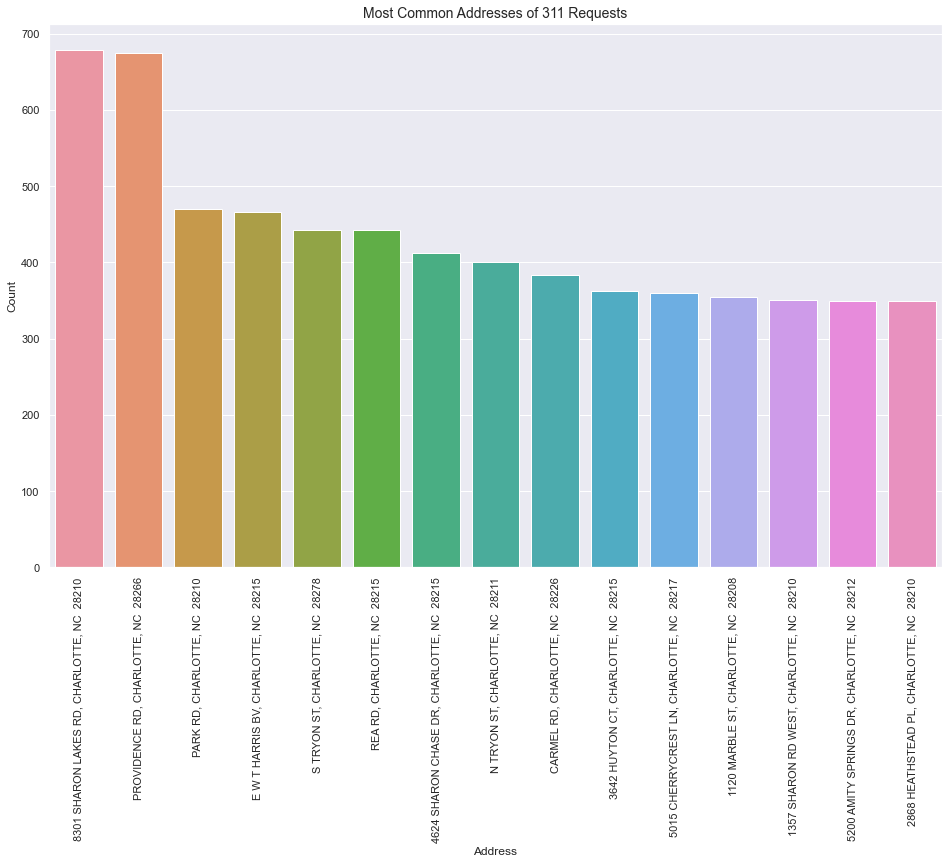

In [109]:
plt.figure(figsize=(16,10))
sns.barplot(x='FULL_ADDRESS', y='OBJECTID', data=counts_df)
plt.xticks(rotation=90)
plt.title("Most Common Addresses of 311 Requests", fontsize=14)
plt.xlabel("Address")
plt.ylabel("Count")
plt.show()

The top 2 locations have quite a bit more records compared to the rest, and then it tappers off.

What are the most common request types?

In [110]:
counts_df = clt_nc_df.groupby('REQUEST_TYPE').agg({'OBJECTID':'count'}).sort_values(by='OBJECTID', ascending=False)[:15]

In [112]:
counts_df = counts_df.reset_index()

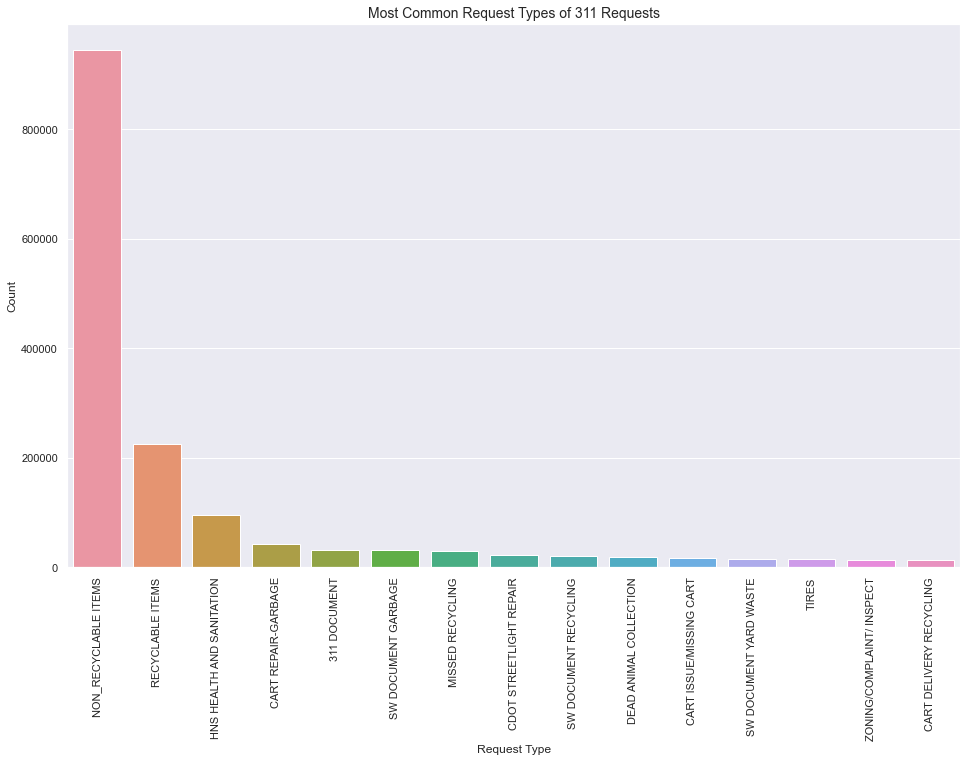

In [114]:
plt.figure(figsize=(16,10))
sns.barplot(x='REQUEST_TYPE', y='OBJECTID', data=counts_df)
plt.xticks(rotation=90)
plt.title("Most Common Request Types of 311 Requests", fontsize=14)
plt.xlabel("Request Type")
plt.ylabel("Count")
plt.show()

By far, the most common request is for non-recyclable items.

What are the most common departments that work with these requests?

In [115]:
counts_df = clt_nc_df.groupby('DEPARTMENT').agg({'OBJECTID':'count'}).sort_values(by='OBJECTID', ascending=False)[:15]

In [116]:
counts_df = counts_df.reset_index()

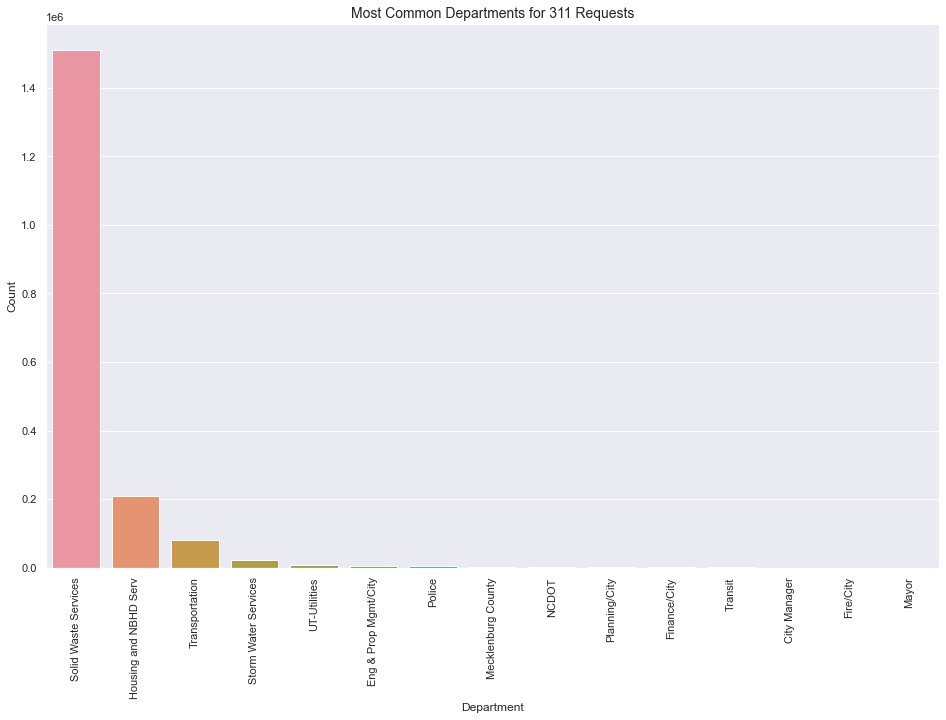

In [118]:
plt.figure(figsize=(16,10))
sns.barplot(x='DEPARTMENT', y='OBJECTID', data=counts_df)
plt.xticks(rotation=90)
plt.title("Most Common Departments for 311 Requests", fontsize=14)
plt.xlabel("Department")
plt.ylabel("Count")
plt.show()

The most common department is Solid Waste Services, which likely is what is correlated with all of the non-recyclable requests.

Are these common addresses close by or far away? 

In [60]:
common_addresses = counts_df.index.tolist()

In [90]:
fil_clt_df = clt_nc_df[clt_nc_df['FULL_ADDRESS'].isin(common_addresses)]
#fil_clt_df = fil_clt_df[fil_clt_df['RECEIVED_DATE'].between('2010-01-01', '2021-01-01')] #to cut down on records



In [95]:
fig = px.scatter_mapbox(fil_clt_df, lat="LATITUDE", lon="LONGITUDE",  
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10, title='Common 311 Request Locations',
                  width=1000, height=1000, text='FULL_ADDRESS')
fig.show()

The addresses are fairly spread out around the city.

It's difficult to plot much else from a high level due to the volume of the dataset.